# About the Dataset

This dataset contains date and time of attempts on an Australian website. The data was collected using fail2ban logs on a set of pre-defined rules as to what was considered a hacking attempt, such as multiple failed login retries, repeated attempt to hit particular pages or applications that did not exist. The data included an IP address, which was then transformed in to geospatial co-ordinates - as such, spoofed IP addresses or VPN use may skew results.

Timestamps in AEST (GMT+10) format and cover 21 August 2021 to 13 July 2022

# Dataset files

The dataset contains one csv file with three distinct columns:

1. lat - Latitude: The lattitude for the location of the attempted breach
2. lng - Longitude: The Longitude for the location of the attempted breach
3. datetime - time stamp corresponding to location with date

# Setting The NoteBook

In [3]:
# Importing Modules to be used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Modules for mapping

import plotly.express as px
import configparser

In [5]:
# Setting up the mapbox API and Access Token
config = configparser.ConfigParser()
config.read('mapbox_access.ini')
mapbox_access_token = config['map_box']['mapbox_access_token']

# Importing the Dataset

In [6]:
geodata = pd.read_csv('hacking_attempts_geodata.csv')

In [7]:
geodata.head()

,lat,lng,datetime
0,51.5085,-0.1257,2021-08-21 01:31:46
1,33.7215,73.0433,2021-08-21 01:30:35
2,18.5196,73.8554,2021-08-21 01:30:16
3,22.2783,114.1747,2021-08-21 01:29:35
4,48.1031,29.1260,2021-08-21 01:27:16


# Preprocessing the data

In [8]:
# separate Data and Time in the data:
geodata['date'] = pd.to_datetime(geodata['datetime']).dt.date
geodata['month'] = pd.to_datetime(geodata['datetime']).dt.month
geodata['time'] = pd.to_datetime(geodata['datetime']).dt.time

In [9]:
geodata.head()

,lat,lng,datetime,date,month,time
0,51.5085,-0.1257,2021-08-21 01:31:46,2021-08-21,8,01:31:46
1,33.7215,73.0433,2021-08-21 01:30:35,2021-08-21,8,01:30:35
2,18.5196,73.8554,2021-08-21 01:30:16,2021-08-21,8,01:30:16
3,22.2783,114.1747,2021-08-21 01:29:35,2021-08-21,8,01:29:35
4,48.1031,29.1260,2021-08-21 01:27:16,2021-08-21,8,01:27:16


In [10]:
# drop the datetime column

geodata.drop('datetime', axis=1, inplace=True)
geodata.head()

,lat,lng,date,month,time
0,51.5085,-0.1257,2021-08-21,8,01:31:46
1,33.7215,73.0433,2021-08-21,8,01:30:35
2,18.5196,73.8554,2021-08-21,8,01:30:16
3,22.2783,114.1747,2021-08-21,8,01:29:35
4,48.1031,29.1260,2021-08-21,8,01:27:16


In [11]:
geodata.tail()

,lat,lng,date,month,time
52513,52.3740,4.8897,2022-07-13,7,11:44:26
52514,36.3631,127.3729,2022-07-13,7,11:46:27
52515,10.8230,106.6296,2022-07-13,7,11:48:25
52516,36.3216,127.4193,2022-07-13,7,12:14:35
52517,30.2936,120.1614,2022-07-13,7,12:21:33


In [12]:
# checking for nulls

geodata.isnull().sum()

lat      0
lng      0
date     0
month    0
time     0
dtype: int64

In [13]:
# checking for general data information

geodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52518 entries, 0 to 52517
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     52518 non-null  float64
 1   lng     52518 non-null  float64
 2   date    52518 non-null  object 
 3   month   52518 non-null  int64  
 4   time    52518 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.0+ MB


Everything looks good. We proceed to EDA

# Exploratory Data Analysis

## Objectives

1. Plot the data on a map of all the hacking locations
2. Determine location with the highest number of breach counts.
3. Determine the month with the highest number of breaches.
4. Determine the date with the highest number of breaches

## 1. Map of hacking attempt locations

In [14]:
fig = px.scatter_mapbox(geodata,
                        lat='lat',
                        lon='lng',
                        color_discrete_sequence=["red"],
                        zoom=1)

fig.update_layout(mapbox_style="dark", mapbox_accesstoken=mapbox_access_token, margin={'b':0,'l':0,'r':0,})

fig.show()

### Observations

1. No hacking attempts were recorded to originate from Australia
2. There are relatively few hacking attampts originating from the South American and African Continents
3. There are some hacking attempts not located within mainland continents. A likely indication of hacking attampts from Islands or cruise ships
4. The majority of the hacking attempts are from Europe amd Nurth America

## 2. Location with the highest number of breaches

In [15]:
breach_counts = geodata.groupby(['lat','lng']).size().sort_values(ascending=False).reset_index(name='counts')

In [16]:
breach_counts.head(10)

,lat,lng,counts
0,39.9075,116.3972,4218
1,22.2783,114.1747,2556
2,1.3215,103.6957,1889
3,52.3740,4.8897,1786
4,40.8043,-74.0000,1661
5,23.1167,113.2500,1504
6,31.2222,121.4581,1442
7,51.5085,0.0000,1136
8,40.8344,-74.0000,1066
9,16.0678,108.2208,1042


In [17]:
# Determining the coodinates which recorded the highest number of breaches

breach_counts.loc[breach_counts['counts'].idxmax()]

lat         39.9075
lng        116.3972
counts    4218.0000
Name: 0, dtype: float64

### Observation

1. The coodiantes with the highest recorded number of breaches os: [39.9075, 116.3972] with a recorded 4218 hacking attempts

We will then visualize this on a map as shown below:

In [18]:
fig = px.scatter_mapbox(breach_counts,
                        lat='lat',
                        lon='lng',
                        hover_name="counts",
                        size='counts',
                        color_discrete_sequence=["red"],
                        zoom=1)

fig.update_layout(mapbox_style="dark", mapbox_accesstoken=mapbox_access_token, margin={'b':0,'l':0,'r':0,})

fig.show()

### Observation

After visualization of the counts, we can observe that:

1. The coodiantes with the highest recorded number of breaches os: [39.9075, 116.3972] with a recorded 4218 hacking attempts is associated with China.
2. The other regions with high hacking attempts include:

    a. Netherlands

    b. United Kingdom

    c. United States of America
    
    d. Malaysia

## 3. highest number of breaches by Time (Time, Day, Month)

### 3.1. Date with the Highest Breaches

In [19]:
date_counts = geodata.groupby(['date']).size().sort_values(ascending=False).reset_index(name='counts')

In [20]:
date_counts.head()

,date,counts
0,2021-08-20,960
1,2021-08-21,924
2,2021-08-18,844
3,2021-08-22,787
4,2021-08-23,775


In [21]:
# Check to view the date with the highest number of hacking attempts

date_counts.loc[date_counts['counts'].idxmax()]

date      2021-08-20
counts           960
Name: 0, dtype: object

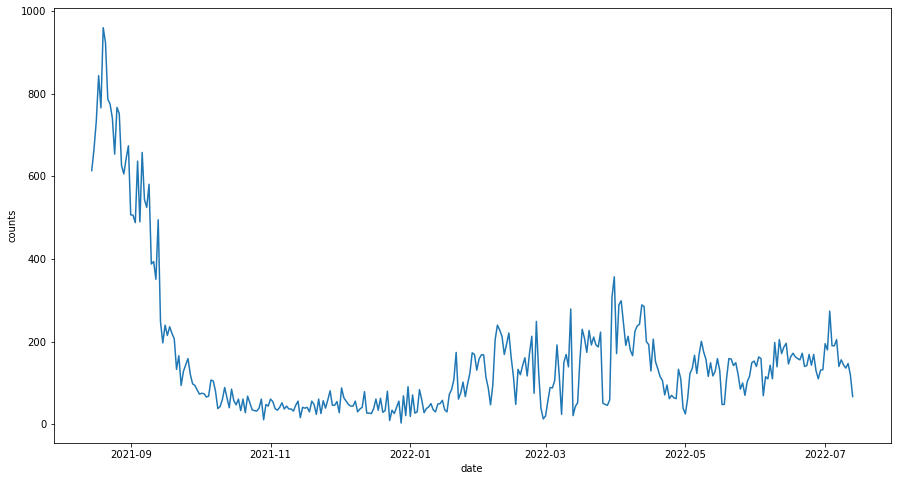

In [22]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=date_counts, x="date", y="counts")

### Observation

1. 2021-08-20 is the date with the highest hacking attempts, recording 960 attempts.

### 3.2. Month with the Highest Breaches

In [23]:
month_counts = geodata.groupby(['month']).size().sort_values(ascending=False).reset_index(name='counts')

In [24]:
month_counts.head()

,month,counts
0,8,12535
1,9,9347
2,4,4973
3,6,4503
4,3,4414


In [25]:
px.bar(month_counts,x="month", y="counts")

### Observation

1. August recorded the highest hacking attempts, recorded 12,535 attempts.

# Export to CSV for tableau visualization

## Main Data

In [35]:
ha_geodata = pd.read_csv('hacking_attempts_geodata.csv')
ha_geodata['month'] = pd.to_datetime(ha_geodata['datetime']).dt.month

In [36]:
ha_geodata.head()

,lat,lng,datetime,month
0,51.5085,-0.1257,2021-08-21 01:31:46,8
1,33.7215,73.0433,2021-08-21 01:30:35,8
2,18.5196,73.8554,2021-08-21 01:30:16,8
3,22.2783,114.1747,2021-08-21 01:29:35,8
4,48.1031,29.1260,2021-08-21 01:27:16,8


In [37]:
ha_geodata.to_csv('hacking_attempts_geodata_cleaned.csv')
print('Sucessfuly Exported!')

Sucessfuly Exported!


## Breach Counts

In [66]:
breach_counts.head()

,lat,lng,counts
0,39.9075,116.3972,4218
1,22.2783,114.1747,2556
2,1.3215,103.6957,1889
3,52.3740,4.8897,1786
4,40.8043,-74.0000,1661


In [29]:
breach_counts.to_csv('hacking_counts.csv')
print('Sucessfuly Exported!')

Sucessfuly Exported!


## Month Data

In [39]:
month_counts['month_name'] = pd.to_datetime(month_counts['month'], format='%m').dt.month_name()

In [40]:
month_counts.head()

,month,counts,month_name
0,8,12535,August
1,9,9347,September
2,4,4973,April
3,6,4503,June
4,3,4414,March


In [41]:
month_counts.to_csv('month_counts.csv')
print('Sucessfuly Exported!')

Sucessfuly Exported!


## Date Counts

In [53]:
ha_geodata.head(10)

,lat,lng,datetime,month
0,51.5085,-0.1257,2021-08-21 01:31:46,8
1,33.7215,73.0433,2021-08-21 01:30:35,8
2,18.5196,73.8554,2021-08-21 01:30:16,8
3,22.2783,114.1747,2021-08-21 01:29:35,8
4,48.1031,29.1260,2021-08-21 01:27:16,8
5,1.2897,103.8501,2021-08-21 02:25:34,8
6,39.9075,116.3972,2021-08-21 02:21:21,8
7,13.2257,77.5750,2021-08-15 00:04:04,8
8,39.0437,-77.0000,2021-08-15 00:05:00,8
9,6.4541,3.3947,2021-08-15 00:05:11,8


In [63]:
date_counts = ha_geodata.groupby(['datetime', 'lat', 'lng']).size().reset_index(name='counts')
date_counts['date'] = pd.to_datetime(date_counts['datetime']).dt.date

In [64]:
date_counts.head()

,datetime,lat,lng,counts,date
0,2021-08-15 00:04:04,13.2257,77.5750,1,2021-08-15
1,2021-08-15 00:05:00,39.0437,-77.0000,1,2021-08-15
2,2021-08-15 00:05:11,6.4541,3.3947,1,2021-08-15
3,2021-08-15 00:05:28,39.9075,116.3972,1,2021-08-15
4,2021-08-15 00:09:42,12.9719,77.5937,1,2021-08-15


In [65]:
date_counts.to_csv('date_counts.csv')
print('Sucessfuly Exported!')

Sucessfuly Exported!
